# Picking out M31 analogs with satellites

Here, we pick out M31 analogs with $\rm M_* = 5\times 10^{10} - 1\times 10^{11} M_{\odot}$ and with a companion with stellar mass ratio $\rm M_{sat}/ M_{31} = 1/10 - 1/100$ and a minimum separation of $10$ kpc.

Main findings: 
M31-analogs with these types of satellite companions have roughly the same *median* separation and *median* velocity in: Illustris dark, TNG dark, and TNG hydro. However, the Illustris hydro separations are roughly +60-80 kpc higher, while the median velocities are still roughly consistent. 

The *mean* separations and velocities display the same inconsistency. 


In [189]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gd
from utils.paths import SetupPaths
from utils.get_summary_data import compile_summary
from vectorCorrection import vectorCorrection as vector


paths = SetupPaths()

In [190]:
plt.rcParams.update({'font.size':20})

In [235]:
palette = {"Illustris":"#668AFF","TNG": "#B6DAFF",
           "Illustris dark": "#009292", "Illustris hydro": "#B6DAFF",
           "TNG dark": "#930200", "TNG hydro": "#FFB5DC"}
lab = ["Illustris dark","Illustris hydro", "TNG dark", "TNG hydro"]

## Print and plot the mean and median separations and velocities of M31 sats

In [194]:
def get_data(sim, phys, med=False):
    
    # picking z=0 snapshot
    if sim == "Illustris":
        snapshot = 135
    elif sim == "TNG":
        snapshot = 99
    
    
    pair_path = f"{sim}_{snapshot}_10.hdf5"
    pair_data = h5py.File(f"{paths.path_pairs}{pair_path}", "r")
    
    data = pair_data["pairs"][phys]

    primary_stell = np.array(data["Sub1 Stellar Mass"])
    
    # defining masks:
    primary_analog = (primary_stell > 5) & (primary_stell < 10)
    minorminor = (np.array(data["Stellar Mass Ratio"]) < 1/10) & (np.array(data["Stellar Mass Ratio"]) > 1/100)
    med_mask = np.array(data["Realization"]) == -1
    minsep = np.array(data["Separation"]) > 10
    maxsep = np.array(data["Separation"]) < 400

#     use_mask_med = primary_analog & minorminor & med_mask & minsep
    use_mask = primary_analog & minorminor & minsep & maxsep

    sublist = {} # dictionary  of subhalos in group
    
    if med:
        use_mask = use_mask_med
        
    for key, val in data.items():
        sublist[key] = np.array(val)[use_mask]
        
    numpairs = sum(use_mask)
        
        
    mean_sep = np.median(sublist['Separation'])
    qs_sep = np.percentile(sublist['Separation'],[16,84])

    mean_vel = np.median(sublist['RelVel'])
    qs_vel = np.percentile(sublist['RelVel'],[16,84])
    
    return numpairs, mean_sep, qs_sep, mean_vel, qs_vel

In [195]:
def get_data_means(sim, phys, med=False):
    
    # picking z=0 snapshot
    if sim == "Illustris":
        snapshot = 135
    elif sim == "TNG":
        snapshot = 99
    
    
    pair_path = f"{sim}_{snapshot}_10.hdf5"
    pair_data = h5py.File(f"{paths.path_pairs}{pair_path}", "r")
    
    data = pair_data["pairs"][phys]

    primary_stell = np.array(data["Sub1 Stellar Mass"])
    
    # defining masks:
    primary_analog = (primary_stell > 5) & (primary_stell < 10)
    minorminor = (np.array(data["Stellar Mass Ratio"]) < 1/10) & (np.array(data["Stellar Mass Ratio"]) > 1/100)
    med_mask = np.array(data["Realization"]) == -1
    minsep = np.array(data["Separation"]) > 10
    maxsep = np.array(data["Separation"]) < 400

#     use_mask_med = primary_analog & minorminor & med_mask & minsep
    use_mask = primary_analog & minorminor & minsep & maxsep

    sublist = {} # dictionary  of subhalos in group
    
    if med:
        use_mask = use_mask_med
        
    for key, val in data.items():
        sublist[key] = np.array(val)[use_mask]
        
    numpairs = sum(use_mask)
        
        
    mean_sep = np.mean(sublist['Separation'])
    qs_sep = np.std(sublist['Separation'])

    mean_vel = np.mean(sublist['RelVel'])
    qs_vel = np.std(sublist['RelVel'])
    
    return numpairs, mean_sep, qs_sep, mean_vel, qs_vel

In [196]:
seps_mean = []
qseps_mean = []
vels_mean = []
qvels_mean = []

print("MEANS")

for sim in ["Illustris","TNG"]:
    print(f"  {sim}:")
    print("  ----------")
    for phys in ['dark','hydro']:
        num, sep, qs_sep, vel, qs_vel = get_data_means(sim,phys)
        print(f"  {phys} --  num pairs: {num}")
        seps_mean.append(sep)
        qseps_mean.append(qs_sep)
        vels_mean.append(vel)
        qvels_mean.append(qs_vel)
        
        print(f"    - sep = {sep:.2f} kpc  - vel = {vel:.2f}") 

MEANS
  Illustris:
  ----------
  dark --  num pairs: 1892
    - sep = 178.48 kpc  - vel = 198.63
  hydro --  num pairs: 1506
    - sep = 210.04 kpc  - vel = 197.50
  TNG:
  ----------
  dark --  num pairs: 2306
    - sep = 179.65 kpc  - vel = 188.27
  hydro --  num pairs: 1973
    - sep = 174.67 kpc  - vel = 190.77


In [197]:
seps = []
qseps = []
vels = []
qvels = []

print("MEDIANS")

for sim in ["Illustris","TNG"]:
    print(f"   {sim}:")
    print("   ----------")
    for phys in ['dark','hydro']:
        num, sep, qs_sep, vel, qs_vel = get_data(sim,phys)
        print(f"   {phys} --  num pairs: {num}")
        seps.append(sep)
        qseps.append(qs_sep)
        vels.append(vel)
        qvels.append(qs_vel)
        
        print(f"     - sep = {sep:.2f} kpc  - vel = {vel:.2f}") 

MEDIANS
   Illustris:
   ----------
   dark --  num pairs: 1892
     - sep = 165.55 kpc  - vel = 182.52
   hydro --  num pairs: 1506
     - sep = 203.77 kpc  - vel = 186.78
   TNG:
   ----------
   dark --  num pairs: 2306
     - sep = 156.14 kpc  - vel = 176.20
   hydro --  num pairs: 1973
     - sep = 154.64 kpc  - vel = 181.31


In [264]:
qseps_mean

[102.36429812670208, 100.88035636181695, 101.4758554418092, 107.31181343682047]

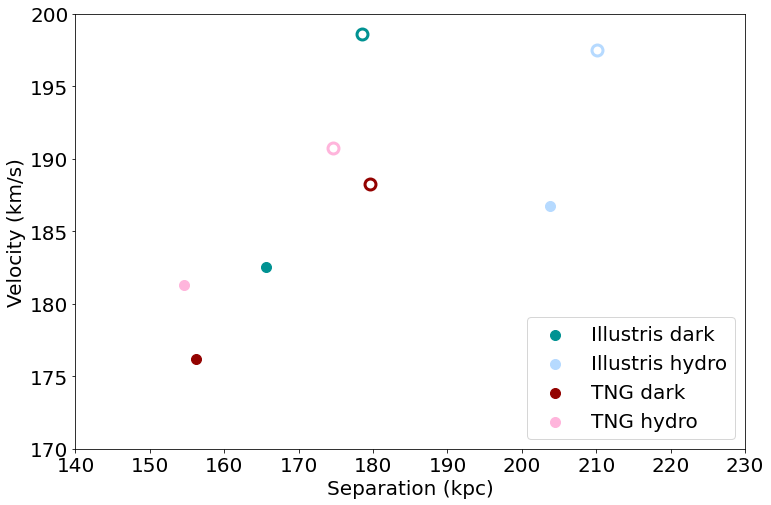

In [204]:
fig = plt.figure(figsize=(12,8))
for i in range(4):
    plt.scatter(x=seps_mean[i], y=vels_mean[i],color="white",marker="o",edgecolors=palette[lab[i]],s=120,linewidth=3)
    plt.scatter(x=seps[i], y=vels[i],label=lab[i],color=palette[lab[i]],s=100)

plt.ylim(170,200)
plt.xlim(140,230)
plt.xlabel("Separation (kpc)")
plt.ylabel("Velocity (km/s)")
plt.legend(loc="lower right")
plt.show()

## Separation distribution for M31 minor sats

In [205]:
def get_full(sim,phys):
    if sim == "Illustris":
        snapshot = 135
    elif sim == "TNG":
        snapshot = 99
        
        
    pair_path = f"{sim}_{snapshot}_10.hdf5"
    pair_data = h5py.File(f"{paths.path_pairs}{pair_path}", "r")

    data = pair_data["pairs"][phys]

    primary_stell = np.array(data["Sub1 Stellar Mass"])

    # defining masks:
    primary_analog = (primary_stell > 5) & (primary_stell < 10)
    minorminor = (np.array(data["Stellar Mass Ratio"]) < 1/10) & (np.array(data["Stellar Mass Ratio"]) > 1/100)
    minsep = np.array(data["Separation"]) > 10
    maxsep = np.array(data["Separation"]) < 400


    use_mask = primary_analog & minorminor & minsep & maxsep

    sublist = {} # dictionary  of subhalos in group

    for key, val in data.items():
        sublist[key] = np.array(val)[use_mask]

    return sublist

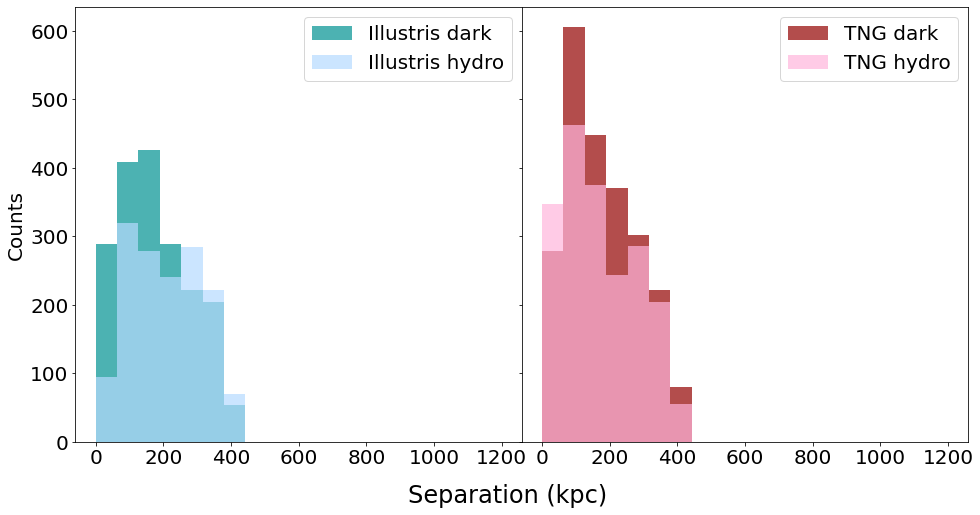

In [246]:
fig, ax = plt.subplots(1,2,figsize=(16,8),sharey=True)
plt.subplots_adjust(wspace=0,hspace=0)

for phys in ["dark","hydro"]:
    subill = get_full("Illustris",phys)
    subtng = get_full("TNG",phys)
    ax[0].hist(subill["Separation"],color=palette[f"Illustris {phys}"],label=f"Illustris {phys}",alpha=0.7,bins=np.linspace(0,1200,20))
    ax[1].hist(subtng["Separation"],color=palette[f"TNG {phys}"],label=f"TNG {phys}",alpha=0.7,bins=np.linspace(0,1200,20))
ax[0].legend()
ax[1].legend()
fig.supxlabel("Separation (kpc)")
ax[0].set_ylabel("Counts")
plt.show()

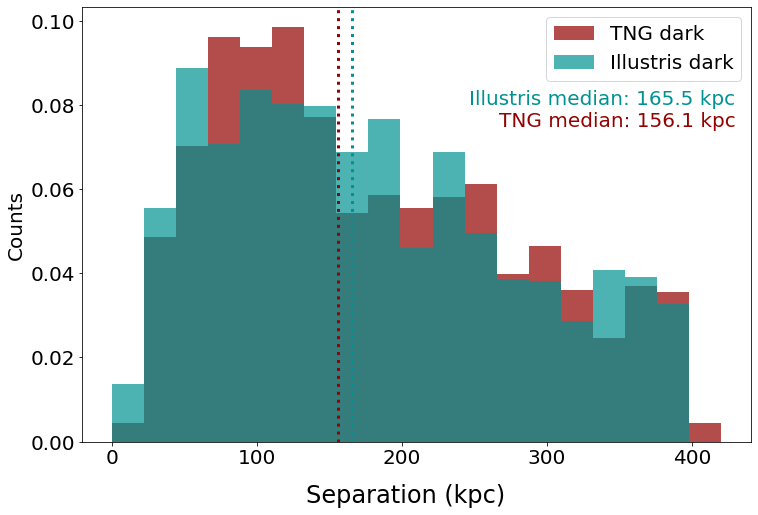

In [244]:
fig, ax = plt.subplots(1,1,figsize=(12,8),sharey=True)

phys = "dark"
subill = get_full("Illustris",phys)
subtng = get_full("TNG",phys)

tngmed = np.median(subtng["Separation"])
illmed = np.median(subill["Separation"])

illweights = np.ones(len(subill["Separation"]))/len(subill["Separation"])
tngweights = np.ones(len(subtng["Separation"]))/len(subtng["Separation"])

bins = np.linspace(0,420,20)

ax.hist(subtng["Separation"],color=palette[f"TNG {phys}"], weights=tngweights, label=f"TNG {phys}",alpha=0.7,bins=bins)
ax.hist(subill["Separation"],color=palette[f"Illustris {phys}"], weights=illweights, label=f"Illustris {phys}",alpha=0.7,bins=bins)

ax.axvline(tngmed, color=palette["TNG dark"], linestyle="dotted", lw=3)
ax.axvline(illmed, color=palette["Illustris dark"], linestyle="dotted", lw=3)

ax.text(430,0.075,f"TNG median: {tngmed:.1f} kpc",color=palette["TNG dark"],ha='right')
ax.text(430,0.08,f"Illustris median: {illmed:.1f} kpc",color=palette["Illustris dark"],ha='right')

ax.legend()

fig.supxlabel("Separation (kpc)")
ax.set_ylabel("Counts")
plt.show()

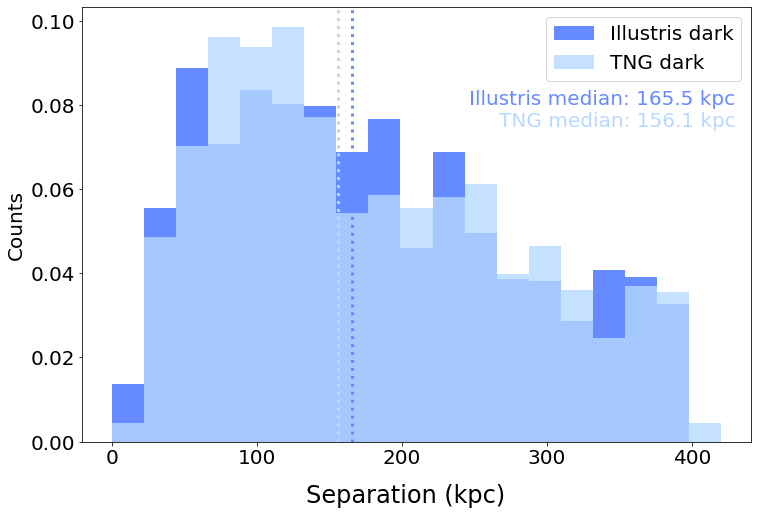

In [245]:
fig, ax = plt.subplots(1,1,figsize=(12,8),sharey=True)

phys = "dark"
subill = get_full("Illustris",phys)
subtng = get_full("TNG",phys)

tngmed = np.median(subtng["Separation"])
illmed = np.median(subill["Separation"])

illweights = np.ones(len(subill["Separation"]))/len(subill["Separation"])
tngweights = np.ones(len(subtng["Separation"]))/len(subtng["Separation"])

bins = np.linspace(0,420,20)

ax.hist(subill["Separation"],color=palette[f"Illustris"], weights=illweights, label=f"Illustris {phys}",bins=bins)
ax.hist(subtng["Separation"],color=palette[f"TNG"], weights=tngweights, label=f"TNG {phys}",alpha=0.8,bins=bins)

ax.axvline(tngmed, color=palette["TNG"], linestyle="dotted", lw=3)
ax.axvline(illmed, color=palette["Illustris"], linestyle="dotted", lw=3)

ax.text(430,0.075,f"TNG median: {tngmed:.1f} kpc",color=palette["TNG"],ha='right')
ax.text(430,0.08,f"Illustris median: {illmed:.1f} kpc",color=palette["Illustris"],ha='right')

ax.legend()

fig.supxlabel("Separation (kpc)")
ax.set_ylabel("Counts")
plt.show()

In [249]:
subill

{'Group ID': array([ 380,  380,  384, ..., 2624, 2730, 2730], dtype=int32),
 'Group Mass': array([647.32274142, 647.32274142, 640.22458683, ...,  74.90791516,
         77.22206549,  77.22206549]),
 'Group Nsubs': array([66, 66, 43, ...,  7,  5,  5]),
 'Group Radius': array([486.88090931, 486.88090931, 485.09502411, ..., 237.24644834,
        239.66583339, 239.66583339]),
 'Realization': array([ 4, 10, -1, ...,  0,  1,  2]),
 'RelVel': array([261.02895857, 202.92419641, 144.51123104, ..., 123.78126456,
        259.44940598, 259.44940598]),
 'Separation': array([333.37196982, 309.71263884, 189.36618077, ..., 103.88333178,
         22.46897736,  22.46897736]),
 'Stellar Mass Ratio': array([0.09678347, 0.08116713, 0.08815414, ..., 0.01028754, 0.01297403,
        0.01697128]),
 'Sub1 BHMass': array([0, 0, 0, ..., 0, 0, 0]),
 'Sub1 BHMdot': array([0, 0, 0, ..., 0, 0, 0]),
 'Sub1 GasMetallicity': array([0, 0, 0, ..., 0, 0, 0]),
 'Sub1 ID': array([438265, 438265, 439338, ..., 632112, 635932, 6

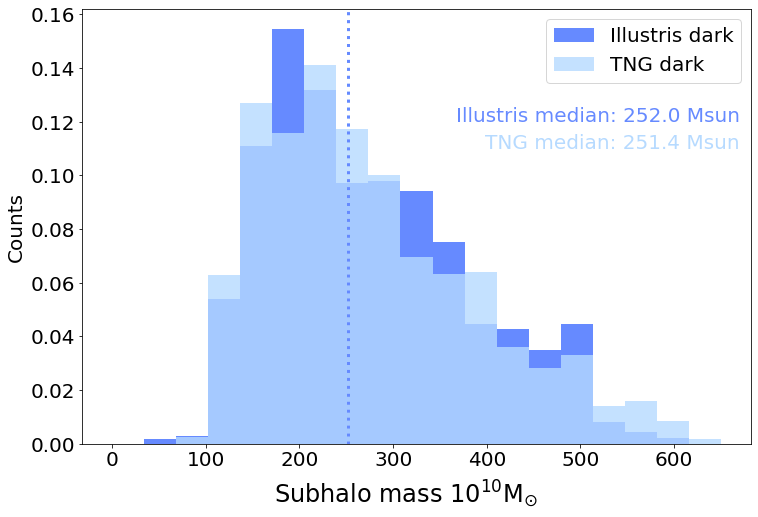

In [262]:
fig, ax = plt.subplots(1,1,figsize=(12,8),sharey=True)

phys = "dark"
key = "Sub1 Mass"
subill = get_full("Illustris",phys)
subtng = get_full("TNG",phys)

tngmed = np.median(subtng[key])
illmed = np.median(subill[key])

illweights = np.ones(len(subill[key]))/len(subill[key])
tngweights = np.ones(len(subtng[key]))/len(subtng[key])

bins = np.linspace(0,650,20)

ax.hist(subill[key],color=palette[f"Illustris"], weights=illweights, label=f"Illustris {phys}",bins=bins)
ax.hist(subtng[key],color=palette[f"TNG"], weights=tngweights, label=f"TNG {phys}",alpha=0.8,bins=bins)

ax.axvline(tngmed, color=palette["TNG"], linestyle="dotted", lw=3)
ax.axvline(illmed, color=palette["Illustris"], linestyle="dotted", lw=3)

ax.text(670,0.11,f"TNG median: {tngmed:.1f} Msun",color=palette["TNG"],ha='right')
ax.text(670,0.12,f"Illustris median: {illmed:.1f} Msun",color=palette["Illustris"],ha='right')

ax.legend()

fig.supxlabel(r"Subhalo mass $10^{10} \rm M_{\odot}$")
ax.set_ylabel("Counts")
plt.show()